In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#%matplotlib notebook
import scipy.constants as pc 
import os
from KT import rh_norm

In [16]:
tau = 'Taumaline'
f = os.path.join(tau, 'gx_dat_full_taumaline.csv')

In [10]:
reader = pd.read_csv(f, sep=',',iterator=True) 
df = reader.get_chunk(1000)

In [11]:
df.columns

Index(['#bin_num', 'tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'omega_spin_1', 'omega_spin_2', 't_birth',
       't_evol_GW', 'sep_final', 'ecc_final', 'porb_final', 'xGx', 'yGx',
       'zGx', 'dist'],
      dtype='object')

In [19]:
m_d = np.array(df['mass_1']) * 1.989e30
m_a = np.array(df['mass_2']) * 1.989e30

p_orb = 24*60*60*np.array(df['porb_final']) #to seconds
f = 1/p_orb

In [23]:
f

array([2.12242503e-04, 4.89994271e-04, 1.53115654e-04, 3.03634155e-04,
       4.06925455e-05, 1.32634754e-04, 5.36207313e-06, 3.37615809e-05,
       1.11115019e-04, 2.29765896e-05, 3.86924246e-04, 4.72471235e-05,
       2.48558532e-05, 4.61057084e-05, 2.00786873e-04, 5.31566324e-05,
       4.11887017e-05, 4.46620659e-05, 3.73225390e-05, 1.39035214e-04,
       2.22830464e-05, 2.39137498e-05, 1.12856308e-04, 1.99833855e-04,
       9.34630269e-06, 2.82549583e-04, 2.71216338e-04, 9.92004952e-05,
       2.23829818e-05, 9.34295332e-06, 1.94764215e-04, 9.53085800e-05,
       1.65917135e-04, 3.32687356e-04, 7.74726195e-05, 1.01593964e-04,
       1.78809389e-04, 1.56043476e-04, 2.28779002e-05, 5.11868245e-05,
       1.86025849e-04, 2.33262546e-05, 1.70274161e-04, 8.62466850e-05,
       1.57078287e-04, 3.10639608e-05, 1.68002429e-04, 5.09973694e-05,
       1.96392670e-04, 1.47324416e-04, 1.68562012e-04, 2.66027797e-05,
       5.52259131e-04, 2.00536401e-04, 4.81450050e-05, 1.21590931e-04,
      

In [135]:
def is_mass_transfer(md,ma,sep):
    a = 0.5 * sep #orbital radius
    q = md/ma
    R_d = 0.0114 * ((md/1.44) ** (-2/3) - (md/1.44) **(2/3)) ** (1/2) \
            * (1 + 3.5 * (md/0.00057) ** (-2/3) + (md/0.00057) ** (-1)) ** (-2/3)
    
    R_l = a * (0.49 * q**(2/3)) / (0.6 * q ** (2/3) + np.log(1 + q ** (1/3)))
    return R_l >= R_d 

In [138]:
def log_log(d):
    freq = np.array(d['Freq'])
    dhnorm = np.array(d['dhnorm'])
    return (np.log(freq),np.log(dhnorm))

def lin(d):
    freq = np.array(d['Freq'])
    dhnorm = np.array(d['dhnorm'])
    return (freq,dhnorm)

In [37]:
df_full = pd.read_csv(os.path.join(tau,'full_DWD_0.txt'),sep=' ',skiprows=11)

In [38]:
df_full

,BinNum,SigType,WDbintype,Freq,dhnorm,md,ma,mchirp,tbirth,Porb,dist,sep,SNR
0,333496,1,1,0.000424,0.002813,0.260443,0.469214,0.301736,4285.660,4711.59,8.77538,0.544819,0.053483
1,601181,1,1,0.000980,0.004336,0.235040,0.448943,0.279892,4218.320,2040.84,12.51370,0.305249,0.556825
2,382363,1,1,0.000306,0.002021,0.243458,0.438213,0.281936,321.314,6531.01,11.76390,0.662134,0.016702
3,727495,1,1,0.000607,0.003449,0.248550,0.472899,0.295439,6946.010,3293.44,9.90587,0.427499,0.153910
4,546538,1,1,0.000081,0.001130,0.336779,0.449496,0.338008,5683.740,24574.50,7.77554,1.679890,0.000216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32663245,412352,1,3,0.000117,0.002892,0.285842,1.364030,0.514138,642.886,17129.20,8.03437,1.690740,0.001602
32663246,787970,1,5,0.000042,0.002790,0.588010,1.338510,0.759713,939.517,47997.80,7.79190,3.538670,0.000073
32663247,497643,1,5,0.000020,0.001590,0.601393,1.189160,0.727850,742.489,100193.00,8.01802,5.640540,0.000005
32663248,619858,1,3,0.000106,0.002491,0.281006,1.235850,0.487776,511.583,18785.00,8.01856,1.748330,0.001053


In [ ]:
df_1 = df_full[df_full['WDbintype'] == 1]

In [19]:
calc = np.array(df_2['Freq'])
obs = 1/((60*60*24)*np.array(df_2['Porb']))

In [20]:
dhnorm = np.array(df_2['dhnorm'])

In [21]:
log_obs = np.log(obs)

In [22]:
log_dhnorm = np.log(dhnorm)

In [23]:
log_dhnorm

array([-5.87339355, -5.44086298, -6.20420243, ..., -6.44387033,
       -5.99491048, -5.99491048])

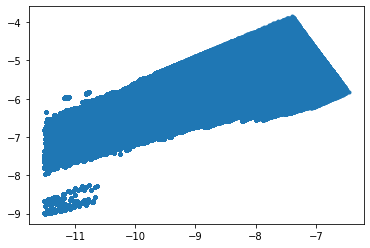

In [36]:
plt.scatter(log_calc,log_dhnorm,marker='.')

In [27]:
log_calc = np.log(calc)

In [31]:
plt.loglog(calc,dhnorm,marker='.')

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 432x288 with 1 Axes>